#General

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, ttest_ind, f_oneway
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [ ]:
df = pd.read_csv('/content/cleaned_survey_data.csv')

In [ ]:
# 1. Rename columns to simpler names
'''
df.columns = [
    'ID', 'start_time', 'end_time', 'email', 'name', 'language', 'last_modified', 'name2', 'email_optional',
    'place', 'age', 'gender', 'education', 'income', 'house_wtp', 'rent_wtp', 'home_type',
    'access_green_space', 'green_space_size', 'green_space_features', 'health_importance',
    'health_influence', 'visit_public_green_space', 'quality_of_life_green_space', 'distance_to_green_space',
    'willing_to_pay_maintenance', 'maintenance_amount', 'reason_not_paying_maintenance', 'luxury_or_necessity',
    'awareness_gov_incentives', 'gov_should_increase_spending', 'gov_incentive_influence',
    'community_bonding_importance', 'social_activities_in_green_space', 'children_education_importance',
    'children_physical_development', 'aesthetic_influence', 'safety_influence', 'support_security_measures',
    'participate_in_future_surveys', 'factors_increasing_wtp', 'contribution_maintenance', 'additional_thoughts'
]
'''

"\ndf.columns = [\n    'ID', 'start_time', 'end_time', 'email', 'name', 'language', 'last_modified', 'name2', 'email_optional',\n    'place', 'age', 'gender', 'education', 'income', 'house_wtp', 'rent_wtp', 'home_type',\n    'access_green_space', 'green_space_size', 'green_space_features', 'health_importance',\n    'health_influence', 'visit_public_green_space', 'quality_of_life_green_space', 'distance_to_green_space',\n    'willing_to_pay_maintenance', 'maintenance_amount', 'reason_not_paying_maintenance', 'luxury_or_necessity',\n    'awareness_gov_incentives', 'gov_should_increase_spending', 'gov_incentive_influence',\n    'community_bonding_importance', 'social_activities_in_green_space', 'children_education_importance',\n    'children_physical_development', 'aesthetic_influence', 'safety_influence', 'support_security_measures',\n    'participate_in_future_surveys', 'factors_increasing_wtp', 'contribution_maintenance', 'additional_thoughts'\n]\n"

In [ ]:
df.columns = [
    'name2', 'email_optional',
    'place', 'age', 'gender', 'education', 'income', 'house_wtp', 'rent_wtp', 'home_type',
    'access_green_space', 'green_space_size', 'green_space_features', 'health_importance',
    'health_influence', 'visit_public_green_space', 'quality_of_life_green_space', 'distance_to_green_space',
    'willing_to_pay_maintenance', 'maintenance_amount', 'reason_not_paying_maintenance', 'luxury_or_necessity',
    'awareness_gov_incentives', 'gov_should_increase_spending', 'gov_incentive_influence',
    'community_bonding_importance', 'social_activities_in_green_space', 'children_education_importance',
    'children_physical_development', 'aesthetic_influence', 'safety_influence', 'support_security_measures'
]

In [ ]:
df.head()

,name2,email_optional,place,age,gender,education,income,house_wtp,rent_wtp,home_type,...,awareness_gov_incentives,gov_should_increase_spending,gov_incentive_influence,community_bonding_importance,social_activities_in_green_space,children_education_importance,children_physical_development,aesthetic_influence,safety_influence,support_security_measures
0,NaN,NaN,"Bangalore, Karnataka",25-34,Male,Post-Graduate,"₹3,00,000-₹7,00,000",5-10%,5% - 10% more,Apartment,...,No,Yes,Yes,Extremely important,Seasonal,Neutral,Extremely important,Significantly,Significantly,Yes
1,NaN,NaN,"Kolkata, West Bengal",25-34,Male,Post-Graduate,"₹7,00,000-₹10,00,000",5-10%,Up to 5% more,Apartment,...,No,Yes,Yes,Somewhat important,Seasonal,Extremely important,Extremely important,Significantly,Significantly,Maybe
2,NaN,NaN,"Kolkata, West Bengal",25-34,Female,Graduate,"₹10,00,000-₹12,00,000",Less than 5%,Up to 5% more,Apartment,...,Yes,Yes,Yes,Extremely important,Seasonal,Extremely important,Extremely important,Significantly,Significantly,Maybe
3,NaN,NaN,"Bangalore, Karnataka",25-34,Male,Post-Graduate,"₹3,00,000-₹7,00,000",10-15%,Up to 5% more,Apartment,...,Yes,Yes,Yes,Extremely important,Seasonal,Extremely important,Extremely important,Significantly,Significantly,Yes
4,NaN,NaN,"Kolkata, West Bengal",35-44,Female,Doctorate,"₹7,00,000-₹10,00,000",5-10%,5% - 10% more,Apartment,...,No,Yes,Yes,Extremely important,Seasonal,Extremely important,Extremely important,Significantly,Significantly,Yes


In [ ]:
'''
# List of columns to drop
columns_to_drop = ['ID', 'start_time', 'end_time', 'email', 'name', 'language', 'last_modified',
                   'participate_in_future_surveys', 'factors_increasing_wtp', 'contribution_maintenance', 'additional_thoughts']

# Drop specified columns
df_cleaned = df.drop(columns=columns_to_drop, errors='ignore')

# Save the cleaned DataFrame to a new CSV file
df_cleaned.to_csv('cleaned_data.csv', index=False)
'''

"\n# List of columns to drop\ncolumns_to_drop = ['ID', 'start_time', 'end_time', 'email', 'name', 'language', 'last_modified',\n                   'participate_in_future_surveys', 'factors_increasing_wtp', 'contribution_maintenance', 'additional_thoughts']\n\n# Drop specified columns\ndf_cleaned = df.drop(columns=columns_to_drop, errors='ignore')\n\n# Save the cleaned DataFrame to a new CSV file\ndf_cleaned.to_csv('cleaned_data.csv', index=False)\n"

In [ ]:
df.shape

(243, 32)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 32 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   name2                             214 non-null    object
 1   email_optional                    84 non-null     object
 2   place                             243 non-null    object
 3   age                               243 non-null    object
 4   gender                            243 non-null    object
 5   education                         243 non-null    object
 6   income                            243 non-null    object
 7   house_wtp                         243 non-null    object
 8   rent_wtp                          243 non-null    object
 9   home_type                         243 non-null    object
 10  access_green_space                243 non-null    object
 11  green_space_size                  243 non-null    object
 12  green_space_features  

In [ ]:
df.describe(include='object')

,name2,email_optional,place,age,gender,education,income,house_wtp,rent_wtp,home_type,...,awareness_gov_incentives,gov_should_increase_spending,gov_incentive_influence,community_bonding_importance,social_activities_in_green_space,children_education_importance,children_physical_development,aesthetic_influence,safety_influence,support_security_measures
count,214,84,243,243,243,243,243,243,243,243,...,243,243,243,243,243,243,243,243,243,243
unique,211,84,2,5,3,7,6,7,6,5,...,2,3,3,5,6,5,5,4,5,3
top,Pawan Kumar,abhishekdas1@iisc.ac.in,"Kolkata, West Bengal",25-34,Male,Post-Graduate,"₹3,00,000-₹7,00,000",5-10%,5% - 10% more,Apartment,...,No,Yes,Yes,Extremely important,Seasonal,Extremely important,Extremely important,Significantly,Significantly,Yes
freq,2,1,161,150,144,129,74,95,83,117,...,189,211,164,138,86,199,205,123,113,150


In [ ]:
print(df['house_wtp'].value_counts())

house_wtp
5-10%            95
10-15%           36
0-5%             36
15-20%           30
More than 20%    23
Less than 5%     12
0%               11
Name: count, dtype: int64


In [ ]:
df['wtp_class'] = df['house_wtp'].map(lambda x: 0 if x in ['0%', 'Less than 5% ', '0-5% '] else 1)

In [ ]:
df['wtp_class'].value_counts()

,count
wtp_class,
1,184
0,59


In [ ]:
df['rent_wtp'].value_counts()

,count
rent_wtp,
5% - 10% more,83
Up to 5% more,78
I am not willing to pay more,38
10% - 20% more,29
20% - 30% more,9
More than 30% more,6


In [ ]:
df['rent_wtp_class'] = df['rent_wtp'].map(lambda x: 0 if x in ['I am not willing to pay more'] else 1)

In [ ]:
df['rent_wtp_class'].value_counts()

,count
rent_wtp_class,
1,205
0,38


# Descriptive stat

In [ ]:

# List of specific variables for analysis
selected_columns = [
    'age', 'gender', 'education', 'income', 'house_wtp',
    'access_green_space', 'green_space_size', 'health_importance',
    'health_influence', 'visit_public_green_space', 'quality_of_life_green_space', 'distance_to_green_space',
    'luxury_or_necessity', 'awareness_gov_incentives', 'gov_should_increase_spending', 'gov_incentive_influence',
    'community_bonding_importance', 'social_activities_in_green_space', 'children_education_importance',
    'children_physical_development', 'aesthetic_influence', 'safety_influence'
]

# Filter the DataFrame to include only selected columns
df_selected = df[selected_columns]

# Function to generate descriptive statistics for selected variables
def descriptive_stats(df):
    summary_table = []

    for column in df.columns:
        if df[column].dtype == 'object' or df[column].dtype == 'category':  # Categorical variables
            counts = df[column].value_counts(dropna=False)  # Count occurrences, including NaN
            total = len(df[column])  # Total responses for the variable

            for category, count in counts.items():
                percentage = (count / total) * 100  # Calculate percentage
                summary_table.append({
                    "Variables": column,
                    "Category (under variable)": category if pd.notna(category) else "Missing/NaN",
                    "Count": count,
                    "Percentage": round(percentage, 2)
                })
        else:
            summary_table.append({
                "Variables": column,
                "Category (under variable)": "Numeric Variable",
                "Count": df[column].count(),
                "Percentage": "-"
            })

    # Convert list of dictionaries to DataFrame
    summary_df = pd.DataFrame(summary_table)
    return summary_df

# Generate the summary table for selected variables
summary_statistics = descriptive_stats(df_selected)

# Display the resulting table
print(summary_statistics)

# Save the summary table to a new CSV file (optional)
summary_statistics.to_csv("descriptive_statistics_selected_variables.csv", index=False)

           Variables Category (under variable)  Count  Percentage
0                age                     25-34    150       61.73
1                age                    18-24      40       16.46
2                age                     35-44     34       13.99
3                age                     45-54     15        6.17
4                age                       55+      4        1.65
..               ...                       ...    ...         ...
92  safety_influence            Significantly     113       46.50
93  safety_influence                Moderately     92       37.86
94  safety_influence                  Slightly     24        9.88
95  safety_influence                Not at All     10        4.12
96  safety_influence                Negatively      4        1.65

[97 rows x 4 columns]


#Demographic Variables

In [ ]:


# Step 1: Select the demographic variables
demographic_vars = ['age', 'gender', 'education', 'income']

# Step 2: Perform one-hot encoding on these demographic variables
data_encoded = pd.get_dummies(df[demographic_vars], drop_first=True)

# Step 3: Convert any boolean columns to integers (True/False to 1/0)
data_encoded = data_encoded.astype(int)


In [ ]:
data_encoded.head()

,age_25-34,age_35-44,age_45-54,age_55+,gender_Male,gender_Other,education_Graduate,education_Higher Secondary,education_Others,education_Post-Graduate,education_Primary,education_Secondary,"income_Under ₹3,00,000","income_₹10,00,000-₹12,00,000","income_₹12,00,000-₹15,00,000","income_₹3,00,000-₹7,00,000","income_₹7,00,000-₹10,00,000"
0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
2,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
data_encoded['wtp_class'] = df['wtp_class']

In [ ]:
data_encoded['wtp_class'].value_counts()

,count
wtp_class,
1,184
0,59


In [ ]:
data_encoded.head()

,age_25-34,age_35-44,age_45-54,age_55+,gender_Male,gender_Other,education_Graduate,education_Higher Secondary,education_Others,education_Post-Graduate,education_Primary,education_Secondary,"income_Under ₹3,00,000","income_₹10,00,000-₹12,00,000","income_₹12,00,000-₹15,00,000","income_₹3,00,000-₹7,00,000","income_₹7,00,000-₹10,00,000",wtp_class
0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1
1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1
2,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1


In [ ]:
# 4. Perform Logistic Regression
X = data_encoded.drop(columns=['wtp_class'])  # Independent variables
y = data_encoded['wtp_class']                 # Dependent variable


In [ ]:
X.head()

,age_25-34,age_35-44,age_45-54,age_55+,gender_Male,gender_Other,education_Graduate,education_Higher Secondary,education_Others,education_Post-Graduate,education_Primary,education_Secondary,"income_Under ₹3,00,000","income_₹10,00,000-₹12,00,000","income_₹12,00,000-₹15,00,000","income_₹3,00,000-₹7,00,000","income_₹7,00,000-₹10,00,000"
0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
2,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
# Step 4: Add a constant to the model (intercept)
X = sm.add_constant(X)

# Step 5: Fit the logistic regression model with statsmodels
model = sm.Logit(y, X)
result = model.fit()

# Step 6: Print the summary to see p-values
print(result.summary())


         Current function value: 0.497928
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:              wtp_class   No. Observations:                  243
Model:                          Logit   Df Residuals:                      225
Method:                           MLE   Df Model:                           17
Date:                Thu, 21 Nov 2024   Pseudo R-squ.:                  0.1017
Time:                        04:58:59   Log-Likelihood:                -121.00
converged:                      False   LL-Null:                       -134.69
Covariance Type:            nonrobust   LLR p-value:                   0.05260
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            2.4727      0.899      2.750      0.006       0.710       4.235
age_25-34  

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
glm = sm.GLM(y,
             X,
             family=sm.families.Binomial())

results = glm.fit()

In [ ]:
print(results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              wtp_class   No. Observations:                  243
Model:                            GLM   Df Residuals:                      225
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -66.000
Date:                Thu, 14 Nov 2024   Deviance:                       132.00
Time:                        06:16:28   Pearson chi2:                     265.
No. Iterations:                    19   Pseudo R-squ. (CS):            0.07976
Covariance Type:            nonrobust                                         
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

#Using Likert scale Health(mental,social, physical)

In [ ]:
health_columns = ['health_importance', 'health_influence', 'quality_of_life_green_space',
                    'children_education_importance', 'children_physical_development', 'safety_influence',
                    'community_bonding_importance','wtp_class']
new_df = df[health_columns]


In [ ]:

new_df.head()

,health_importance,health_influence,quality_of_life_green_space,children_education_importance,children_physical_development,safety_influence,community_bonding_importance,wtp_class
0,Somewhat important,Strongly influence,Somewhat important,Neutral,Extremely important,Significantly,Extremely important,1
1,Extremely important,Moderately influence,Extremely important,Extremely important,Extremely important,Significantly,Somewhat important,1
2,Extremely important,Strongly influence,Somewhat important,Extremely important,Extremely important,Significantly,Extremely important,0
3,Extremely important,Strongly influence,Extremely important,Extremely important,Extremely important,Significantly,Extremely important,1
4,Extremely important,Strongly influence,Extremely important,Extremely important,Extremely important,Significantly,Extremely important,1


In [ ]:
import pandas as pd
import statsmodels.api as sm


# Step 2: Encode Likert scale values
likert_mapping = {'Extremely important': 5, 'Somewhat important': 4, 'Neutral': 3,
                  'Somewhat not important': 2, 'Extremely not important': 1}

likert_mapping_2 = {'Significantly ' : 5 , 'Moderately': 4 , 'Slightly' : 3 , 'Not at All' : 2 , 'Negatively' : 1}


likert_mapping_3 = {'Strongly influence ': 5, 'Moderately influence': 4, 'Slightly influence': 3,
                  'Do not influence': 2, 'Negatively influence': 1}


for col in ['health_influence']:
    new_df[col] = new_df[col].map(likert_mapping_3)

for col in ['safety_influence']:
    new_df[col] = new_df[col].map(likert_mapping_2)

for col in ['health_importance', 'quality_of_life_green_space', 'children_education_importance', 'children_physical_development','community_bonding_importance']:
    new_df[col] = new_df[col].map(likert_mapping)




<ipython-input-15-5beea557eb37>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df[col] = new_df[col].map(likert_mapping_3)
<ipython-input-15-5beea557eb37>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df[col] = new_df[col].map(likert_mapping_2)
<ipython-input-15-5beea557eb37>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

In [ ]:
# Step 3: Define X (features) and y (target)
X = new_df[['health_importance', 'health_influence','quality_of_life_green_space', 'children_education_importance', 'children_physical_development','safety_influence',
                    'community_bonding_importance']]
y = new_df['wtp_class']


In [ ]:
X.head()

,health_importance,health_influence,quality_of_life_green_space,children_education_importance,children_physical_development,safety_influence,community_bonding_importance
0,4,5,4,3,5,5,5
1,5,4,5,5,5,5,4
2,5,5,4,5,5,5,5
3,5,5,5,5,5,5,5
4,5,5,5,5,5,5,5


In [ ]:
y.value_counts()

,count
wtp_class,
1,184
0,59


In [ ]:
# prompt: Using dataframe X: correlation matrix

# Calculate the correlation matrix
correlation_matrix = X.corr()

# Display the correlation matrix
correlation_matrix

,health_importance,health_influence,quality_of_life_green_space,children_education_importance,children_physical_development,safety_influence,community_bonding_importance
health_importance,1.000000,0.572014,0.582565,0.447673,0.437104,0.379418,0.428882
health_influence,0.572014,1.000000,0.480763,0.338041,0.341946,0.342457,0.488257
quality_of_life_green_space,0.582565,0.480763,1.000000,0.385493,0.436234,0.506548,0.523794
children_education_importance,0.447673,0.338041,0.385493,1.000000,0.737171,0.378241,0.414663
children_physical_development,0.437104,0.341946,0.436234,0.737171,1.000000,0.444999,0.453373
safety_influence,0.379418,0.342457,0.506548,0.378241,0.444999,1.000000,0.425944
community_bonding_importance,0.428882,0.488257,0.523794,0.414663,0.453373,0.425944,1.000000


In [ ]:
X['health_influence'].value_counts()

,count
health_influence,
5,148
4,69
3,16
2,10


In [ ]:
X.describe()

,health_importance,health_influence,quality_of_life_green_space,children_education_importance,children_physical_development,safety_influence,community_bonding_importance
count,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,4.674897,4.460905,4.514403,4.761317,4.798354,4.234568,4.452675
std,0.713844,0.793513,0.751581,0.596673,0.557145,0.908249,0.739124
min,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,4.000000
50%,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000
75%,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [ ]:
y.value_counts()

,count
wtp_class,
1,184
0,59


In [ ]:
# Step 4: Add a constant to the model (intercept)
X_const = sm.add_constant(X)

# Step 5: Fit the logistic regression model with statsmodels
model = sm.Logit(y, X_const)
result = model.fit()

# Step 6: Print the summary to see p-values
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.494720
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              wtp_class   No. Observations:                  243
Model:                          Logit   Df Residuals:                      235
Method:                           MLE   Df Model:                            7
Date:                Thu, 21 Nov 2024   Pseudo R-squ.:                  0.1075
Time:                        05:01:03   Log-Likelihood:                -120.22
converged:                       True   LL-Null:                       -134.69
Covariance Type:            nonrobust   LLR p-value:                 0.0001479
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            -4.8228      1.579     -3.055      0.

###Factor analysis

In [ ]:
X.head()

,health_importance,health_influence,quality_of_life_green_space,children_education_importance,children_physical_development,safety_influence,community_bonding_importance
0,4,5,4,3,5,5,5
1,5,4,5,5,5,5,4
2,5,5,4,5,5,5,5
3,5,5,5,5,5,5,5
4,5,5,5,5,5,5,5


In [ ]:
from sklearn.decomposition import FactorAnalysis
from sklearn.preprocessing import StandardScaler

In [ ]:
!pip install factor_analyzer #Install the package using pip. This will download and install the factor_analyzer package and its dependencies
from factor_analyzer import FactorAnalyzer # Import the library after installation

In [ ]:
X.head()

,health_importance,health_influence,quality_of_life_green_space,children_education_importance,children_physical_development,safety_influence,community_bonding_importance
0,4,5,4,3,5,5,5
1,5,4,5,5,5,5,4
2,5,5,4,5,5,5,5
3,5,5,5,5,5,5,5
4,5,5,5,5,5,5,5


In [ ]:


fa = FactorAnalyzer(n_factors=2, rotation="varimax")  # Adjust the number of factors
fa.fit(X)

# Get factor loadings
# Assuming X is your original DataFrame before scaling
factor_loadings = pd.DataFrame(fa.loadings_, index=X.columns, columns=["Factor1", "Factor2"])
# Use X.columns for index instead of X_scaled.columns
print(factor_loadings)


                                Factor1   Factor2
health_importance              0.686266  0.273744
health_influence               0.675952  0.171319
quality_of_life_green_space    0.727773  0.257784
children_education_importance  0.324933  0.690359
children_physical_development  0.263910  0.943000
safety_influence               0.488198  0.333646
community_bonding_importance   0.593209  0.317516


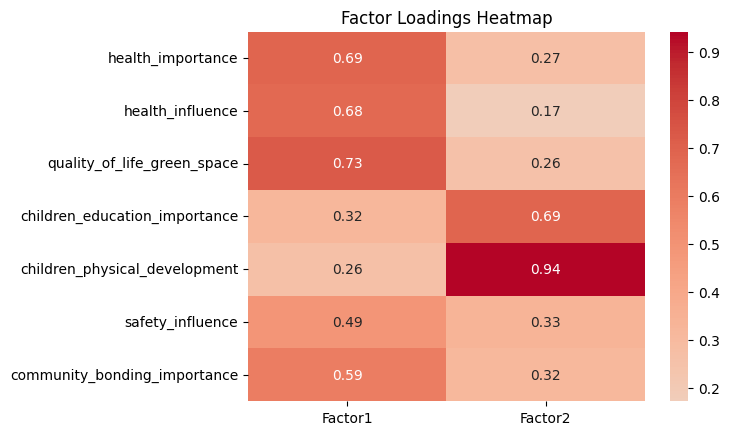

In [ ]:


sns.heatmap(factor_loadings, annot=True, cmap="coolwarm", center=0)
plt.title("Factor Loadings Heatmap")
plt.show()


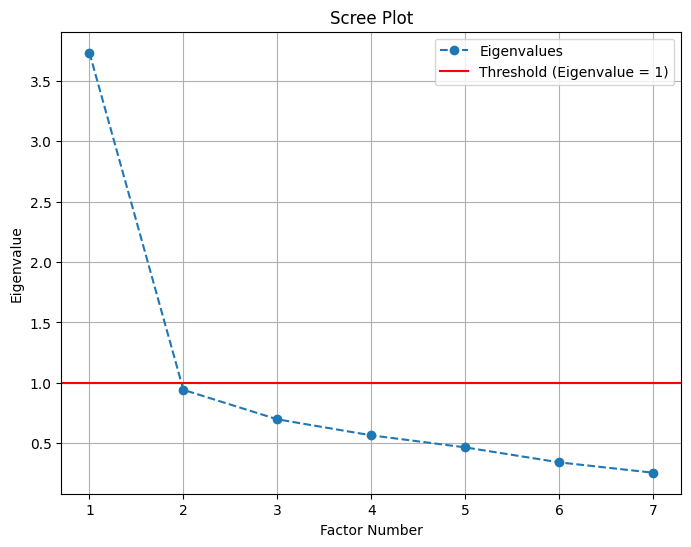

In [ ]:
import matplotlib.pyplot as plt

# Get eigenvalues of the correlation matrix
eigenvalues, _ = fa.get_eigenvalues()

# Create scree plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o', linestyle='--', label='Eigenvalues')
plt.axhline(y=1, color='r', linestyle='-', label='Threshold (Eigenvalue = 1)')
plt.title("Scree Plot")
plt.xlabel("Factor Number")
plt.ylabel("Eigenvalue")
plt.legend()
plt.grid()
plt.show()

In [ ]:
eigenvalues, _ = fa.get_eigenvalues()
print(eigenvalues)  # Look for eigenvalues > 1


[3.73413734 0.94188056 0.69754621 0.5648829  0.46514422 0.34116067
 0.25524809]


In [ ]:
fa.get_communalities()

array([0.54589679, 0.48626188, 0.59610619, 0.58217706, 0.95889846,
       0.34965677, 0.45271403])

In [ ]:
# Step 3: Get Factor Scores (these are the transformed data points representing your factors)
factor_scores = fa.transform(X)  # Get the factor scores
factor_data = pd.DataFrame(factor_scores, columns=["Factor1", "Factor2"])

# Step 4: Add the dependent variable (wtp_class) to the factor scores DataFrame
factor_data["wtp_class"] = y.values  # 'y' is your dependent variable (wtp_class)

# Step 5: Define the independent (X) and dependent (y) variables
X_factors = factor_data[["Factor1", "Factor2"]]  # Independent variables (factor scores)
y_factors = factor_data["wtp_class"]  # Dependent variable (wtp_class)

# Step 6: Add constant to the model (for the intercept)
X_factors = sm.add_constant(X_factors)

# Step 7: Perform Logistic Regression
model = sm.Logit(y_factors, X_factors)  # Logistic regression model
result = model.fit()  # Fit the model

# Step 8: Display the result summary
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.511944
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:              wtp_class   No. Observations:                  243
Model:                          Logit   Df Residuals:                      240
Method:                           MLE   Df Model:                            2
Date:                Wed, 20 Nov 2024   Pseudo R-squ.:                 0.07639
Time:                        05:13:01   Log-Likelihood:                -124.40
converged:                       True   LL-Null:                       -134.69
Covariance Type:            nonrobust   LLR p-value:                 3.402e-05
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2058      0.159      7.584      0.000       0.894       1.517
Factor1        0.6627      0.

In [ ]:
y_factors.value_counts()

,count
wtp_class,
1,220
0,23


#Goverment and luxury

In [ ]:
gov_luxury = ['luxury_or_necessity','aesthetic_influence','gov_should_increase_spending', 'gov_incentive_influence','wtp_class']

gov_luxury_df = df[gov_luxury]

In [ ]:
gov_luxury_df.head()

,luxury_or_necessity,aesthetic_influence,gov_should_increase_spending,gov_incentive_influence,wtp_class
0,Necessity,Significantly,Yes,Yes,1
1,Depends on the property and location,Significantly,Yes,Yes,1
2,Necessity,Significantly,Yes,Yes,0
3,Necessity,Significantly,Yes,Yes,1
4,Necessity,Significantly,Yes,Yes,1


In [ ]:
# Step 2: Encode Likert scale values


likert_mapping_2 = {'Significantly ' : 5 , 'Moderately': 4 , 'Slightly' : 3 , 'Not at All' : 2 , 'Negatively' : 1}


likert_luxury = {'Necessity':3 , 'Depends on the property and location':2 , 'Luxury ':1}

likert_yes_no = {'Yes':2 , 'Maybe':1 , 'No':0}


for col in ['aesthetic_influence']:
    gov_luxury_df[col] = gov_luxury_df[col].map(likert_mapping_2)



for col in ['luxury_or_necessity']:
    gov_luxury_df[col] = gov_luxury_df[col].map(likert_luxury)




for col in ['gov_incentive_influence','gov_should_increase_spending']:
    gov_luxury_df[col] = gov_luxury_df[col].map(likert_yes_no)


<ipython-input-15-60031f635093>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gov_luxury_df[col] = gov_luxury_df[col].map(likert_mapping_2)
<ipython-input-15-60031f635093>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gov_luxury_df[col] = gov_luxury_df[col].map(likert_luxury)
<ipython-input-15-60031f635093>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

In [ ]:
# Step 3: Define X (features) and y (target)
X = gov_luxury_df.drop(columns=['wtp_class'])
y = gov_luxury_df['wtp_class']

In [ ]:
X.head()

,luxury_or_necessity,aesthetic_influence,gov_should_increase_spending,gov_incentive_influence
0,3,5,2,2
1,2,5,2,2
2,3,5,2,2
3,3,5,2,2
4,3,5,2,2


In [ ]:
# Step 4: Add a constant to the model (intercept)
X = sm.add_constant(X)

# Step 5: Fit the logistic regression model with statsmodels
model = sm.Logit(y, X)
result = model.fit()

# Step 6: Print the summary to see p-values
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.507296
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              wtp_class   No. Observations:                  243
Model:                          Logit   Df Residuals:                      238
Method:                           MLE   Df Model:                            4
Date:                Thu, 21 Nov 2024   Pseudo R-squ.:                 0.08477
Time:                        05:01:58   Log-Likelihood:                -123.27
converged:                       True   LL-Null:                       -134.69
Covariance Type:            nonrobust   LLR p-value:                 0.0001365
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           -3.0293      0.992     -3.052      0.002

In [ ]:
X['gov_incentive_influence'].value_counts()

,count
gov_incentive_influence,
2,164
1,56
0,23


In [ ]:
X['gov_should_increase_spending'].value_counts()

,count
gov_should_increase_spending,
2,211
1,29
0,3


#Visit Frequency

In [ ]:
visit_frequency = ['visit_public_green_space','social_activities_in_green_space','wtp_class']

visit_frequency_df = df[visit_frequency]

In [ ]:
print(visit_frequency_df['visit_public_green_space'].value_counts())

visit_public_green_space
Weekly     89
Rarely     58
Daily      51
Monthly    37
Never       8
Name: count, dtype: int64


In [ ]:
print(visit_frequency_df['social_activities_in_green_space'].value_counts())

social_activities_in_green_space
Seasonal    86
Never       46
Weekly      39
Monthly     39
Yearly      17
Daily       16
Name: count, dtype: int64


In [ ]:
#  Encoding Likert scale values


likert_frequncy_1 = {'Daily ' : 5 , 'Weekly': 4 , 'Monthly' : 3 , 'Rarely' : 2 , 'Never' : 1}


likert_frequncy_2 = {'Daily' : 5 , 'Weekly': 4 , 'Monthly' : 3 , 'Seasonal': 3 , 'Yearly' : 2 , 'Never' : 1}


for col in ['visit_public_green_space']:
    visit_frequency_df[col] = visit_frequency_df[col].map(likert_frequncy_1)



for col in ['social_activities_in_green_space']:
    visit_frequency_df[col] = visit_frequency_df[col].map(likert_frequncy_2)




<ipython-input-16-a04f38531f7e>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  visit_frequency_df[col] = visit_frequency_df[col].map(likert_frequncy_1)
<ipython-input-16-a04f38531f7e>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  visit_frequency_df[col] = visit_frequency_df[col].map(likert_frequncy_2)


In [ ]:
# Step 3: Define X (features) and y (target)
X = visit_frequency_df.drop(columns=['wtp_class'])
y = visit_frequency_df['wtp_class']
y_1 = df['rent_wtp_class']

In [ ]:
X.head()

,visit_public_green_space,social_activities_in_green_space
0,4,3
1,5,3
2,2,3
3,5,3
4,3,3


In [ ]:
X['visit_public_green_space'].value_counts()

,count
visit_public_green_space,
4,89
2,58
5,51
3,37
1,8


In [ ]:
X['social_activities_in_green_space'].value_counts()

,count
social_activities_in_green_space,
3,125
1,46
4,39
2,17
5,16


In [ ]:
y.value_counts()

,count
wtp_class,
1,184
0,59


In [ ]:
# Step 4: Add a constant to the model (intercept)
X = sm.add_constant(X)

# Step 5: Fit the logistic regression model with statsmodels
model = sm.Logit(y, X)
result = model.fit()

# Step 6: Print the summary to see p-values
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.539890
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:              wtp_class   No. Observations:                  243
Model:                          Logit   Df Residuals:                      240
Method:                           MLE   Df Model:                            2
Date:                Thu, 21 Nov 2024   Pseudo R-squ.:                 0.02597
Time:                        05:03:41   Log-Likelihood:                -131.19
converged:                       True   LL-Null:                       -134.69
Covariance Type:            nonrobust   LLR p-value:                   0.03026
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                                0.0727      0.494      0.14

In [ ]:
#Rent logistic Model
# Step 4: Add a constant to the model (intercept)
X = sm.add_constant(X)

# Step 5: Fit the logistic regression model with statsmodels
model_1 = sm.Logit(y_1, X)
result = model_1.fit()

# Step 6: Print the summary to see p-values
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.419937
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:         rent_wtp_class   No. Observations:                  243
Model:                          Logit   Df Residuals:                      240
Method:                           MLE   Df Model:                            2
Date:                Mon, 18 Nov 2024   Pseudo R-squ.:                 0.03155
Time:                        09:06:05   Log-Likelihood:                -102.04
converged:                       True   LL-Null:                       -105.37
Covariance Type:            nonrobust   LLR p-value:                   0.03601
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                                0.2738      0.564      0.48

#Logistic regression with all variables


In [ ]:

# Step 1: Select the demographic variables
demographic_vars = ['age', 'gender', 'education', 'income']

# Step 2: Perform one-hot encoding on these demographic variables
data_encoded = pd.get_dummies(df[demographic_vars], drop_first=True)

# Step 3: Convert any boolean columns to integers (True/False to 1/0)
data_encoded = data_encoded.astype(int)

In [ ]:
all_important_columns = ['health_importance', 'health_influence', 'quality_of_life_green_space',
                    'children_education_importance', 'children_physical_development', 'safety_influence',
                    'community_bonding_importance','luxury_or_necessity','aesthetic_influence','gov_should_increase_spending', 'gov_incentive_influence',
                    'visit_public_green_space','social_activities_in_green_space','wtp_class']

new_df = df[all_important_columns]


In [ ]:
# Step 2: Encode Likert scale values
likert_mapping = {'Extremely important': 5, 'Somewhat important': 4, 'Neutral': 3,
                  'Somewhat not important': 2, 'Extremely not important': 1}

likert_mapping_2 = {'Significantly ' : 5 , 'Moderately': 4 , 'Slightly' : 3 , 'Not at All' : 2 , 'Negatively' : 1}


likert_mapping_3 = {'Strongly influence ': 5, 'Moderately influence': 4, 'Slightly influence': 3,
                  'Do not influence': 2, 'Negatively influence': 1}



likert_luxury = {'Necessity':3 , 'Depends on the property and location':2 , 'Luxury ':1}

likert_yes_no_maybe = {'Yes':2 , 'Maybe':1 , 'No':0}


likert_frequncy_1 = {'Daily ' : 5 , 'Weekly': 4 , 'Monthly' : 3 , 'Rarely' : 2 , 'Never' : 1}


likert_frequncy_2 = {'Daily' : 5 , 'Weekly': 4 , 'Monthly' : 3 , 'Seasonal': 3 , 'Yearly' : 2 , 'Never' : 1}



for col in ['health_influence']:
    new_df[col] = new_df[col].map(likert_mapping_3)

for col in ['safety_influence', 'aesthetic_influence']:
    new_df[col] = new_df[col].map(likert_mapping_2)

for col in ['health_importance', 'quality_of_life_green_space', 'children_education_importance', 'children_physical_development','community_bonding_importance']:
    new_df[col] = new_df[col].map(likert_mapping)



for col in ['luxury_or_necessity']:
    new_df[col] = new_df[col].map(likert_luxury)


for col in ['gov_incentive_influence','gov_should_increase_spending']:
    new_df[col] = new_df[col].map(likert_yes_no_maybe)


for col in ['visit_public_green_space']:
    new_df[col] = new_df[col].map(likert_frequncy_1)


for col in ['social_activities_in_green_space']:
    new_df[col] = new_df[col].map(likert_frequncy_2)

<ipython-input-22-fe64335f6e0e>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df[col] = new_df[col].map(likert_mapping_3)
<ipython-input-22-fe64335f6e0e>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df[col] = new_df[col].map(likert_mapping_2)
<ipython-input-22-fe64335f6e0e>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

In [ ]:
#other important column transformation

other_columns = ['home_type','access_green_space', 'green_space_size', 'distance_to_green_space',
                         'awareness_gov_incentives']

other_columns = df[other_columns]

In [ ]:
likert_home_type = {'Apartment ': 5 , 'Independent house' : 4 , 'Other' : 3 , 'Bungalow' : 2 , 'Row house': 1 }

likert_yes_no = {'Yes':1 , 'No':0}

likert_size = { 'More than 500 sq ft': 4 , '100-500 sq ft' : 3 , 'Less than 100 sq ft': 2 , 'No green space ': 1}

likert_distance = {'Less than 1 km ': 3, '1-3 km': 2 , 'More than 3 km': 1}





for col in ['home_type']:
    other_columns[col] = other_columns[col].map(likert_home_type)

for col in ['access_green_space','awareness_gov_incentives']:
    other_columns[col] = other_columns[col].map(likert_yes_no)

for col in ['green_space_size']:
    other_columns[col] = other_columns[col].map(likert_size)


for col in ['distance_to_green_space']:
    other_columns[col] = other_columns[col].map(likert_distance)

<ipython-input-24-ab5fabc43ec6>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  other_columns[col] = other_columns[col].map(likert_home_type)
<ipython-input-24-ab5fabc43ec6>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  other_columns[col] = other_columns[col].map(likert_yes_no)
<ipython-input-24-ab5fabc43ec6>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

In [ ]:
#Combined data frame

combined_df = pd.concat([data_encoded, new_df, other_columns], axis=1, ignore_index=False)

In [ ]:
combined_df.head()

,age_25-34,age_35-44,age_45-54,age_55+,gender_Male,gender_Other,education_Graduate,education_Higher Secondary,education_Others,education_Post-Graduate,...,gov_should_increase_spending,gov_incentive_influence,visit_public_green_space,social_activities_in_green_space,wtp_class,home_type,access_green_space,green_space_size,distance_to_green_space,awareness_gov_incentives
0,1,0,0,0,1,0,0,0,0,1,...,2,2,4,3,1,5,1,1,3,0
1,1,0,0,0,1,0,0,0,0,1,...,2,2,5,3,1,5,1,2,3,0
2,1,0,0,0,0,0,1,0,0,0,...,2,2,2,3,0,5,0,1,1,1
3,1,0,0,0,1,0,0,0,0,1,...,2,2,5,3,1,5,1,4,3,1
4,0,1,0,0,0,0,0,0,0,0,...,2,2,3,3,1,5,1,1,3,0


In [ ]:
combined_df.shape

(243, 36)

In [ ]:
# Step 3: Define X (features) and y (target)
X = combined_df.drop(columns=['wtp_class','quality_of_life_green_space','children_physical_development',
                              'home_type','awareness_gov_incentives','distance_to_green_space','luxury_or_necessity',
                              'health_importance'])
y = combined_df['wtp_class']

In [ ]:
X.shape

(243, 28)

In [ ]:
X.head()

,age_25-34,age_35-44,age_45-54,age_55+,gender_Male,gender_Other,education_Graduate,education_Higher Secondary,education_Others,education_Post-Graduate,...,children_education_importance,safety_influence,community_bonding_importance,aesthetic_influence,gov_should_increase_spending,gov_incentive_influence,visit_public_green_space,social_activities_in_green_space,access_green_space,green_space_size
0,1,0,0,0,1,0,0,0,0,1,...,3,5,5,5,2,2,4,3,1,1
1,1,0,0,0,1,0,0,0,0,1,...,5,5,4,5,2,2,5,3,1,2
2,1,0,0,0,0,0,1,0,0,0,...,5,5,5,5,2,2,2,3,0,1
3,1,0,0,0,1,0,0,0,0,1,...,5,5,5,5,2,2,5,3,1,4
4,0,1,0,0,0,0,0,0,0,0,...,5,5,5,5,2,2,3,3,1,1


In [ ]:
X.columns

Index(['age_25-34', 'age_35-44', 'age_45-54', 'age_55+', 'gender_Male ',
       'gender_Other', 'education_Graduate', 'education_Higher Secondary',
       'education_Others', 'education_Post-Graduate', 'education_Primary',
       'education_Secondary', 'income_Under ₹3,00,000 ',
       'income_₹10,00,000-₹12,00,000', 'income_₹12,00,000-₹15,00,000',
       'income_₹3,00,000-₹7,00,000', 'income_₹7,00,000-₹10,00,000',
       'health_influence', 'children_education_importance', 'safety_influence',
       'community_bonding_importance', 'aesthetic_influence',
       'gov_should_increase_spending', 'gov_incentive_influence',
       'visit_public_green_space', 'social_activities_in_green_space',
       'access_green_space', 'green_space_size'],
      dtype='object')

In [ ]:
# Step 4: Add a constant to the model (intercept)
X_const = sm.add_constant(X)

# Step 5: Fit the logistic regression model with statsmodels
model = sm.Logit(y, X_const)
result = model.fit()

# Step 6: Print the summary to see p-values
print(result.summary())


         Current function value: 0.416052
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:              wtp_class   No. Observations:                  243
Model:                          Logit   Df Residuals:                      214
Method:                           MLE   Df Model:                           28
Date:                Fri, 20 Dec 2024   Pseudo R-squ.:                  0.2494
Time:                        13:21:21   Log-Likelihood:                -101.10
converged:                      False   LL-Null:                       -134.69
Covariance Type:            nonrobust   LLR p-value:                 4.565e-05
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               -6.0083      2.136     -2.813      0.005     -10.195      -1.822

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


#Factor Anlysis with all variables

In [ ]:
df_ordinal = pd.concat([new_df, other_columns], axis=1, ignore_index=False)

In [ ]:
# Step 3: Define X (features) and y (target)
X_1 = df_ordinal.drop(columns=['wtp_class'])
y = df_ordinal['wtp_class']

In [ ]:
X_1.head()

,health_importance,health_influence,quality_of_life_green_space,children_education_importance,children_physical_development,safety_influence,community_bonding_importance,luxury_or_necessity,aesthetic_influence,gov_should_increase_spending,gov_incentive_influence,visit_public_green_space,social_activities_in_green_space,home_type,access_green_space,green_space_size,distance_to_green_space,awareness_gov_incentives
0,4,5,4,3,5,5,5,3,5,2,2,4,3,5,1,1,3,0
1,5,4,5,5,5,5,4,2,5,2,2,5,3,5,1,2,3,0
2,5,5,4,5,5,5,5,3,5,2,2,2,3,5,0,1,1,1
3,5,5,5,5,5,5,5,3,5,2,2,5,3,5,1,4,3,1
4,5,5,5,5,5,5,5,3,5,2,2,3,3,5,1,1,3,0


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_1)

In [ ]:
from sklearn.decomposition import FactorAnalysis
from sklearn.preprocessing import StandardScaler

In [ ]:
!pip install factor_analyzer #Install the package using pip. This will download and install the factor_analyzer package and its dependencies
from factor_analyzer import FactorAnalyzer # Import the library after installation

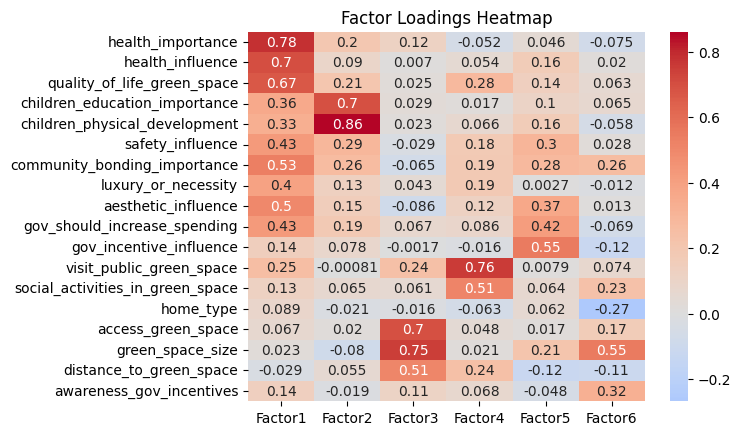

In [ ]:
fa = FactorAnalyzer(n_factors=6, rotation="varimax")  # Adjust the number of factors
fa.fit(X_scaled)

# Get factor loadings
# Assuming X is your original DataFrame before scaling
factor_loadings = pd.DataFrame(fa.loadings_, index=X_1.columns, columns=["Factor1", "Factor2", "Factor3", "Factor4", "Factor5", "Factor6"])

#heatmeat
sns.heatmap(factor_loadings, annot=True, cmap="coolwarm", center=0)
plt.title("Factor Loadings Heatmap")
plt.show()


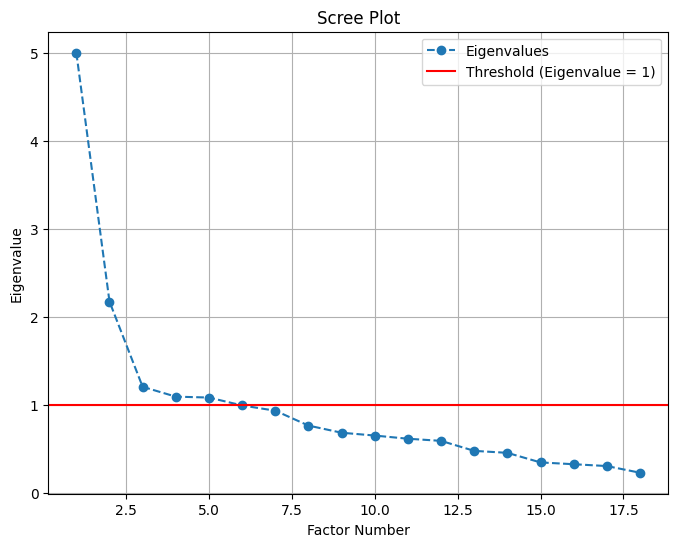

In [ ]:
import matplotlib.pyplot as plt

# Get eigenvalues of the correlation matrix
eigenvalues, _ = fa.get_eigenvalues()

# Create scree plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o', linestyle='--', label='Eigenvalues')
plt.axhline(y=1, color='r', linestyle='-', label='Threshold (Eigenvalue = 1)')
plt.title("Scree Plot")
plt.xlabel("Factor Number")
plt.ylabel("Eigenvalue")
plt.legend()
plt.grid()
plt.show()

In [ ]:
eigenvalues, _ = fa.get_eigenvalues()
print(eigenvalues)  # Look for eigenvalues > 1


[5.0037498  2.17694085 1.20899947 1.09735072 1.08720978 0.99742768
 0.93802418 0.76898975 0.68761186 0.65552794 0.61943409 0.59522117
 0.48162485 0.45921831 0.35024939 0.32992365 0.30914563 0.23335088]


In [ ]:
# Step 3: Get Factor Scores (these are the transformed data points representing your factors)
factor_scores = fa.transform(X_scaled)  # Get the factor scores
factor_data = pd.DataFrame(factor_scores, columns=["Factor1", "Factor2","Factor3" , "Factor4", "Factor5","Factor6"])

# Step 4: Add the dependent variable (wtp_class) to the factor scores DataFrame
factor_data["wtp_class"] = y.values  # 'y' is your dependent variable (wtp_class)

# Step 5: Define the independent (X) and dependent (y) variables
X_factors = factor_data[["Factor1", "Factor2", "Factor3" , "Factor4" , "Factor5" , "Factor6"]]  # Independent variables (factor scores)
y_factors = factor_data["wtp_class"]  # Dependent variable (wtp_class)

# Step 6: Add constant to the model (for the intercept)
X_factors = sm.add_constant(X_factors)

# Step 7: Perform Logistic Regression
model = sm.Logit(y_factors, X_factors)  # Logistic regression model
result = model.fit()  # Fit the model

# Step 8: Display the result summary
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.501309
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              wtp_class   No. Observations:                  243
Model:                          Logit   Df Residuals:                      236
Method:                           MLE   Df Model:                            6
Date:                Thu, 21 Nov 2024   Pseudo R-squ.:                 0.09557
Time:                        05:08:11   Log-Likelihood:                -121.82
converged:                       True   LL-Null:                       -134.69
Covariance Type:            nonrobust   LLR p-value:                 0.0002482
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2325      0.163      7.583      0.000       0.914       1.551
Factor1        0.5873      0.

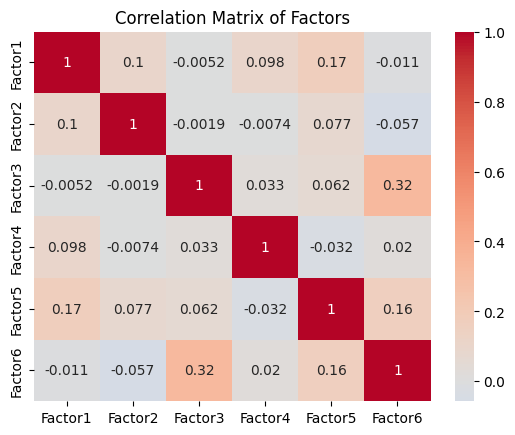

    Factor       VIF
0  Factor1  1.051370
1  Factor2  1.019175
2  Factor3  1.119276
3  Factor4  1.014197
4  Factor5  1.068513
5  Factor6  1.152260


In [ ]:
#Checking the multicolinearity and VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Get factor scores for the oblique rotation
factor_scores = pd.DataFrame(fa.transform(X_scaled), columns=["Factor1", "Factor2", "Factor3", "Factor4", "Factor5", "Factor6"])

# Step 2: Correlation matrix of factors
correlation_matrix = factor_scores.corr()

# Step 3: Plot heatmap of correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Matrix of Factors")
plt.show()

# Step 4: Calculate VIF for each factor
# VIF requires no constant, so only the factors are passed
vif_data = pd.DataFrame()
vif_data["Factor"] = factor_scores.columns
vif_data["VIF"] = [variance_inflation_factor(factor_scores.values, i) for i in range(factor_scores.shape[1])]

# Display the VIFs
print(vif_data)

### other types of rotations

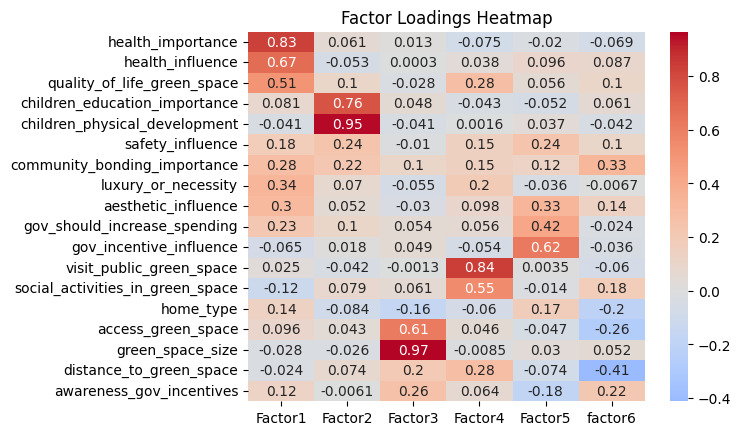

In [ ]:
fa = FactorAnalyzer(n_factors=6, rotation="oblimin")
fa.fit(X_scaled)

# Get factor loadings
# Assuming X is your original DataFrame before scaling
factor_loadings = pd.DataFrame(fa.loadings_, index=X_1.columns, columns=["Factor1", "Factor2", "Factor3", "Factor4", "Factor5","factor6"])

sns.heatmap(factor_loadings, annot=True, cmap="coolwarm", center=0)
plt.title("Factor Loadings Heatmap")
plt.show()

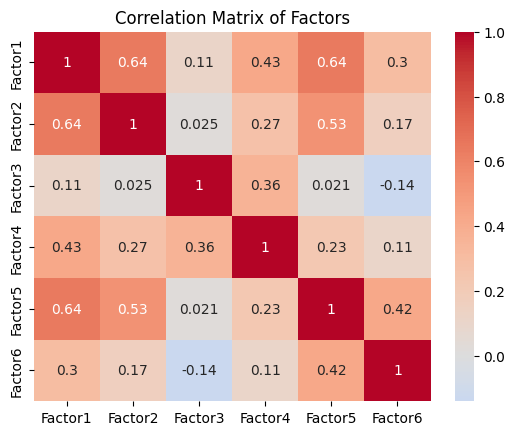

    Factor       VIF
0  Factor1  2.441857
1  Factor2  1.807560
2  Factor3  1.203166
3  Factor4  1.405386
4  Factor5  1.992370
5  Factor6  1.281529


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Get factor scores for the oblique rotation
factor_scores = pd.DataFrame(fa.transform(X_scaled), columns=["Factor1", "Factor2", "Factor3", "Factor4", "Factor5", "Factor6"])

# Step 2: Correlation matrix of factors
correlation_matrix = factor_scores.corr()

# Step 3: Plot heatmap of correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Matrix of Factors")
plt.show()

# Step 4: Calculate VIF for each factor
# VIF requires no constant, so only the factors are passed
vif_data = pd.DataFrame()
vif_data["Factor"] = factor_scores.columns
vif_data["VIF"] = [variance_inflation_factor(factor_scores.values, i) for i in range(factor_scores.shape[1])]

# Display the VIFs
print(vif_data)


In [ ]:
# Step 3: Get Factor Scores (these are the transformed data points representing your factors)
factor_scores = fa.transform(X_scaled)  # Get the factor scores
factor_data = pd.DataFrame(factor_scores, columns=["Factor1", "Factor2","Factor3" , "Factor4", "Factor5","Factor6"])

# Step 4: Add the dependent variable (wtp_class) to the factor scores DataFrame
factor_data["wtp_class"] = y.values  # 'y' is your dependent variable (wtp_class)

# Step 5: Define the independent (X) and dependent (y) variables
X_factors = factor_data[["Factor1", "Factor2", "Factor3" , "Factor4" , "Factor5" , "Factor6"]]  # Independent variables (factor scores)
y_factors = factor_data["wtp_class"]  # Dependent variable (wtp_class)

# Step 6: Add constant to the model (for the intercept)
X_factors = sm.add_constant(X_factors)

# Step 7: Perform Logistic Regression
model = sm.Logit(y_factors, X_factors)  # Logistic regression model
result = model.fit()  # Fit the model

# Step 8: Display the result summary
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.501309
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              wtp_class   No. Observations:                  243
Model:                          Logit   Df Residuals:                      236
Method:                           MLE   Df Model:                            6
Date:                Thu, 21 Nov 2024   Pseudo R-squ.:                 0.09557
Time:                        05:08:22   Log-Likelihood:                -121.82
converged:                       True   LL-Null:                       -134.69
Covariance Type:            nonrobust   LLR p-value:                 0.0002482
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2325      0.163      7.583      0.000       0.914       1.551
Factor1        0.2758      0.

### Quartimax Rotation

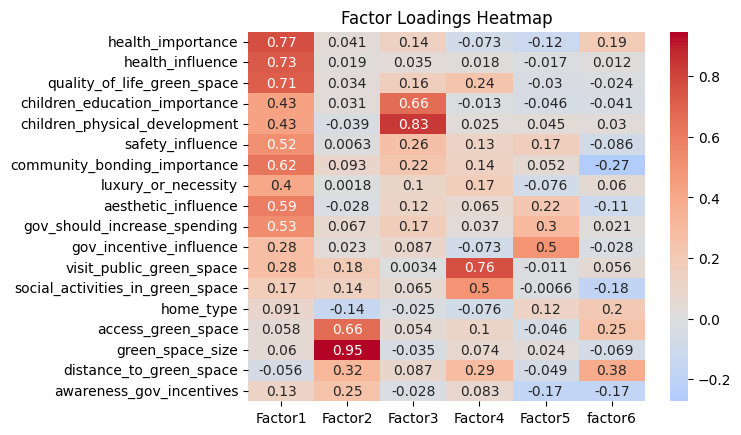

In [ ]:
fa = FactorAnalyzer(n_factors=6, rotation="Quartimax")
fa.fit(X_scaled)

# Get factor loadings
# Assuming X is your original DataFrame before scaling
factor_loadings = pd.DataFrame(fa.loadings_, index=X_1.columns, columns=["Factor1", "Factor2", "Factor3", "Factor4", "Factor5","factor6"])

sns.heatmap(factor_loadings, annot=True, cmap="coolwarm", center=0)
plt.title("Factor Loadings Heatmap")
plt.show()

In [ ]:
# Step 3: Get Factor Scores (these are the transformed data points representing your factors)
factor_scores = fa.transform(X_scaled)  # Get the factor scores
factor_data = pd.DataFrame(factor_scores, columns=["Factor1", "Factor2","Factor3" , "Factor4", "Factor5","Factor6"])

# Step 4: Add the dependent variable (wtp_class) to the factor scores DataFrame
factor_data["wtp_class"] = y.values  # 'y' is your dependent variable (wtp_class)

# Step 5: Define the independent (X) and dependent (y) variables
X_factors = factor_data[["Factor1", "Factor2", "Factor3" , "Factor4" , "Factor5" , "Factor6"]]  # Independent variables (factor scores)
y_factors = factor_data["wtp_class"]  # Dependent variable (wtp_class)

# Step 6: Add constant to the model (for the intercept)
X_factors = sm.add_constant(X_factors)

# Step 7: Perform Logistic Regression
model = sm.Logit(y_factors, X_factors)  # Logistic regression model
result = model.fit()  # Fit the model

# Step 8: Display the result summary
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.501309
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              wtp_class   No. Observations:                  243
Model:                          Logit   Df Residuals:                      236
Method:                           MLE   Df Model:                            6
Date:                Thu, 21 Nov 2024   Pseudo R-squ.:                 0.09557
Time:                        05:08:34   Log-Likelihood:                -121.82
converged:                       True   LL-Null:                       -134.69
Covariance Type:            nonrobust   LLR p-value:                 0.0002482
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2325      0.163      7.583      0.000       0.914       1.551
Factor1        0.7175      0.

###Equamax Rotation

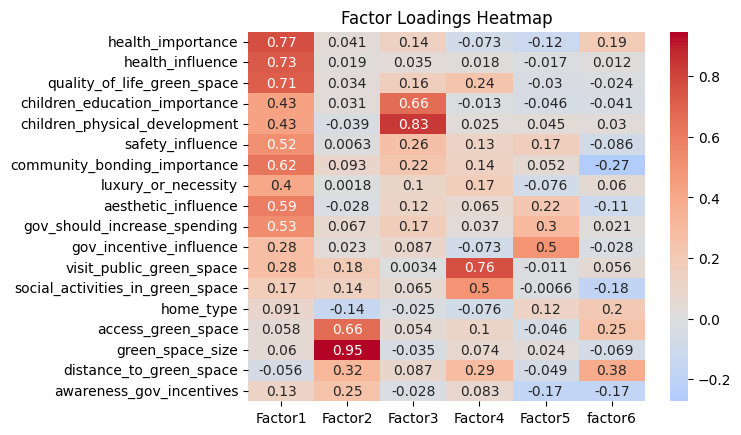

In [ ]:
fa = FactorAnalyzer(n_factors=6, rotation="Equamax")
fa.fit(X_scaled)

# Get factor loadings
# Assuming X is your original DataFrame before scaling
factor_loadings = pd.DataFrame(fa.loadings_, index=X_1.columns, columns=["Factor1", "Factor2", "Factor3", "Factor4", "Factor5","factor6"])

sns.heatmap(factor_loadings, annot=True, cmap="coolwarm", center=0)
plt.title("Factor Loadings Heatmap")
plt.show()

In [ ]:
# Step 3: Get Factor Scores (these are the transformed data points representing your factors)
factor_scores = fa.transform(X_scaled)  # Get the factor scores
factor_data = pd.DataFrame(factor_scores, columns=["Factor1", "Factor2","Factor3" , "Factor4", "Factor5","Factor6"])

# Step 4: Add the dependent variable (wtp_class) to the factor scores DataFrame
factor_data["wtp_class"] = y.values  # 'y' is your dependent variable (wtp_class)

# Step 5: Define the independent (X) and dependent (y) variables
X_factors = factor_data[["Factor1", "Factor2", "Factor3" , "Factor4" , "Factor5" , "Factor6"]]  # Independent variables (factor scores)
y_factors = factor_data["wtp_class"]  # Dependent variable (wtp_class)

# Step 6: Add constant to the model (for the intercept)
X_factors = sm.add_constant(X_factors)

# Step 7: Perform Logistic Regression
model = sm.Logit(y_factors, X_factors)  # Logistic regression model
result = model.fit()  # Fit the model

# Step 8: Display the result summary
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.501309
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              wtp_class   No. Observations:                  243
Model:                          Logit   Df Residuals:                      236
Method:                           MLE   Df Model:                            6
Date:                Thu, 21 Nov 2024   Pseudo R-squ.:                 0.09557
Time:                        04:52:09   Log-Likelihood:                -121.82
converged:                       True   LL-Null:                       -134.69
Covariance Type:            nonrobust   LLR p-value:                 0.0002482
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2325      0.163      7.583      0.000       0.914       1.551
Factor1        0.7175      0.

# Adding columns

In [ ]:
adding_column_df = pd.DataFrame({
    "physical_social_health": combined_df[["health_importance", "health_influence", "safety_influence", "community_bonding_importance"]].sum(axis=1),
    "children_health": combined_df[["children_education_importance", "children_physical_development"]].sum(axis=1),
    "wtp_class": combined_df["wtp_class"],
    "luxury_aesthetics": combined_df[["luxury_or_necessity" , "aesthetic_influence"]].sum(axis=1),
    "availability_green_space" : combined_df[["distance_to_green_space" , "green_space_size"]].sum(axis=1),
    "frequency_green_space" : combined_df[["visit_public_green_space" , "social_activities_in_green_space"]].sum(axis=1),
    "gov_influence" : combined_df[["gov_should_increase_spending", "gov_incentive_influence"]].sum(axis=1)
})

# Display the new DataFrame
print(adding_column_df)

     physical_social_health  children_health  wtp_class  luxury_aesthetics  \
0                        19                8          1                  8   
1                        18               10          1                  7   
2                        20               10          0                  8   
3                        20               10          1                  8   
4                        20               10          1                  8   
..                      ...              ...        ...                ...   
238                      20               10          1                  8   
239                      18               10          1                  8   
240                      17               10          1                  7   
241                      20               10          1                  6   
242                      16                8          1                  6   

     availability_green_space  frequency_green_space  gov_influ

In [ ]:
adding_column_df.columns

Index(['physical_social_health', 'children_health', 'wtp_class',
       'luxury_aesthetics', 'availability_green_space',
       'frequency_green_space', 'gov_influence'],
      dtype='object')

In [ ]:
# Step 3: Define X (features) and y (target)
X = adding_column_df[['physical_social_health', 'children_health',
       'luxury_aesthetics', 'availability_green_space',
       'frequency_green_space', 'gov_influence']]
y = adding_column_df['wtp_class']

In [ ]:
X.head()

,physical_social_health,children_health,luxury_aesthetics,availability_green_space,frequency_green_space,gov_influence
0,19,8,8,4,7,4
1,18,10,7,5,8,4
2,20,10,8,2,5,4
3,20,10,8,7,8,4
4,20,10,8,4,6,4


In [ ]:
# Add a constant to the model (intercept)
X_const = sm.add_constant(X)

#  Fit the logistic regression model with statsmodels
model = sm.Logit(y, X_const)
result = model.fit()

#  Print the summary to see p-values
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.499579
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              wtp_class   No. Observations:                  243
Model:                          Logit   Df Residuals:                      236
Method:                           MLE   Df Model:                            6
Date:                Fri, 22 Nov 2024   Pseudo R-squ.:                 0.09870
Time:                        10:54:23   Log-Likelihood:                -121.40
converged:                       True   LL-Null:                       -134.69
Covariance Type:            nonrobust   LLR p-value:                 0.0001730
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -4.9835      1.672     -2.981      0.003      -8.261

#CVM

In [ ]:
# Step 1: Select the demographic variables
demographic_vars = ['age', 'gender', 'education', 'income']

# Step 2: Perform one-hot encoding on these demographic variables
data_encoded = pd.get_dummies(df[demographic_vars], drop_first=True)

# Step 3: Convert any boolean columns to integers (True/False to 1/0)
data_encoded = data_encoded.astype(int)

In [ ]:
all_important_columns = ['health_importance', 'health_influence', 'quality_of_life_green_space',
                    'children_education_importance', 'children_physical_development', 'safety_influence',
                    'community_bonding_importance','luxury_or_necessity','aesthetic_influence','gov_should_increase_spending', 'gov_incentive_influence',
                    'visit_public_green_space','social_activities_in_green_space']

new_df = df[all_important_columns]

In [ ]:
# Step 2: Encode Likert scale values
likert_mapping = {'Extremely important': 5, 'Somewhat important': 4, 'Neutral': 3,
                  'Somewhat not important': 2, 'Extremely not important': 1}

likert_mapping_2 = {'Significantly ' : 5 , 'Moderately': 4 , 'Slightly' : 3 , 'Not at All' : 2 , 'Negatively' : 1}


likert_mapping_3 = {'Strongly influence ': 5, 'Moderately influence': 4, 'Slightly influence': 3,
                  'Do not influence': 2, 'Negatively influence': 1}



likert_luxury = {'Necessity':3 , 'Depends on the property and location':2 , 'Luxury ':1}

likert_yes_no_maybe = {'Yes':2 , 'Maybe':1 , 'No':0}


likert_frequncy_1 = {'Daily ' : 5 , 'Weekly': 4 , 'Monthly' : 3 , 'Rarely' : 2 , 'Never' : 1}


likert_frequncy_2 = {'Daily' : 5 , 'Weekly': 4 , 'Monthly' : 3 , 'Seasonal': 3 , 'Yearly' : 2 , 'Never' : 1}



for col in ['health_influence']:
    new_df[col] = new_df[col].map(likert_mapping_3)

for col in ['safety_influence', 'aesthetic_influence']:
    new_df[col] = new_df[col].map(likert_mapping_2)

for col in ['health_importance', 'quality_of_life_green_space', 'children_education_importance', 'children_physical_development','community_bonding_importance']:
    new_df[col] = new_df[col].map(likert_mapping)



for col in ['luxury_or_necessity']:
    new_df[col] = new_df[col].map(likert_luxury)


for col in ['gov_incentive_influence','gov_should_increase_spending']:
    new_df[col] = new_df[col].map(likert_yes_no_maybe)


for col in ['visit_public_green_space']:
    new_df[col] = new_df[col].map(likert_frequncy_1)


for col in ['social_activities_in_green_space']:
    new_df[col] = new_df[col].map(likert_frequncy_2)

<ipython-input-18-fe64335f6e0e>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df[col] = new_df[col].map(likert_mapping_3)
<ipython-input-18-fe64335f6e0e>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df[col] = new_df[col].map(likert_mapping_2)
<ipython-input-18-fe64335f6e0e>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

In [ ]:
#other important column transformation

other_columns = ['home_type','access_green_space', 'green_space_size', 'distance_to_green_space',
                         'awareness_gov_incentives']

other_columns = df[other_columns]

In [ ]:
likert_home_type = {'Apartment ': 5 , 'Independent house' : 4 , 'Other' : 3 , 'Bungalow' : 2 , 'Row house': 1 }

likert_yes_no = {'Yes':1 , 'No':0}

likert_size = { 'More than 500 sq ft': 4 , '100-500 sq ft' : 3 , 'Less than 100 sq ft': 2 , 'No green space ': 1}

likert_distance = {'Less than 1 km ': 3, '1-3 km': 2 , 'More than 3 km': 1}





for col in ['home_type']:
    other_columns[col] = other_columns[col].map(likert_home_type)

for col in ['access_green_space','awareness_gov_incentives']:
    other_columns[col] = other_columns[col].map(likert_yes_no)

for col in ['green_space_size']:
    other_columns[col] = other_columns[col].map(likert_size)


for col in ['distance_to_green_space']:
    other_columns[col] = other_columns[col].map(likert_distance)

<ipython-input-20-ab5fabc43ec6>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  other_columns[col] = other_columns[col].map(likert_home_type)
<ipython-input-20-ab5fabc43ec6>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  other_columns[col] = other_columns[col].map(likert_yes_no)
<ipython-input-20-ab5fabc43ec6>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

In [ ]:
# Step 1: Map house_wtp labels to numeric values
wtp_mapping = {
    "5-10%": 10,
    "10-15%": 15,
    "0-5% ": 5,
    "15-20%": 20,
    "More than 20%": 25,
    "Less than 5% ": 5,
    "0%": 0
}

# Apply mapping to the house_wtp column
df["house_wtp"] = df["house_wtp"].map(wtp_mapping)

In [ ]:
df["house_wtp"].value_counts()

,count
house_wtp,
10,95
5,48
15,36
20,30
25,23
0,11


In [ ]:
#Combined data frame

cvm_df = pd.concat([data_encoded, new_df, other_columns,df["house_wtp"]], axis=1, ignore_index=False)

In [ ]:
cvm_df.head()

,age_25-34,age_35-44,age_45-54,age_55+,gender_Male,gender_Other,education_Graduate,education_Higher Secondary,education_Others,education_Post-Graduate,...,gov_should_increase_spending,gov_incentive_influence,visit_public_green_space,social_activities_in_green_space,home_type,access_green_space,green_space_size,distance_to_green_space,awareness_gov_incentives,house_wtp
0,1,0,0,0,1,0,0,0,0,1,...,2,2,4,3,5,1,1,3,0,10
1,1,0,0,0,1,0,0,0,0,1,...,2,2,5,3,5,1,2,3,0,10
2,1,0,0,0,0,0,1,0,0,0,...,2,2,2,3,5,0,1,1,1,5
3,1,0,0,0,1,0,0,0,0,1,...,2,2,5,3,5,1,4,3,1,15
4,0,1,0,0,0,0,0,0,0,0,...,2,2,3,3,5,1,1,3,0,10


In [ ]:
'''
# Step 2: Define dependent and independent variables
y = cvm_df["house_wtp"]  # Dependent variable
X = cvm_df.drop(columns=["house_wtp"])  # Independent variables
'''


'\n# Step 2: Define dependent and independent variables\ny = cvm_df["house_wtp"]  # Dependent variable\nX = cvm_df.drop(columns=["house_wtp"])  # Independent variables\n'

In [ ]:
# Step 3: Define X (features) and y (target)
X = cvm_df.drop(columns=['house_wtp','quality_of_life_green_space','children_physical_development',
                              'home_type','awareness_gov_incentives','distance_to_green_space','luxury_or_necessity',
                              'health_importance'])
y = cvm_df['house_wtp']

In [ ]:
X.head()

,age_25-34,age_35-44,age_45-54,age_55+,gender_Male,gender_Other,education_Graduate,education_Higher Secondary,education_Others,education_Post-Graduate,...,children_education_importance,safety_influence,community_bonding_importance,aesthetic_influence,gov_should_increase_spending,gov_incentive_influence,visit_public_green_space,social_activities_in_green_space,access_green_space,green_space_size
0,1,0,0,0,1,0,0,0,0,1,...,3,5,5,5,2,2,4,3,1,1
1,1,0,0,0,1,0,0,0,0,1,...,5,5,4,5,2,2,5,3,1,2
2,1,0,0,0,0,0,1,0,0,0,...,5,5,5,5,2,2,2,3,0,1
3,1,0,0,0,1,0,0,0,0,1,...,5,5,5,5,2,2,5,3,1,4
4,0,1,0,0,0,0,0,0,0,0,...,5,5,5,5,2,2,3,3,1,1


In [ ]:
# Add a constant term to the model (for the intercept)
X = sm.add_constant(X)

# Step 3: Perform multiple linear regression
model = sm.OLS(y, X).fit()

# Step 4: Display the regression results
print("Regression Results:")
print(model.summary())


Regression Results:
                            OLS Regression Results                            
Dep. Variable:              house_wtp   R-squared:                       0.247
Model:                            OLS   Adj. R-squared:                  0.148
Method:                 Least Squares   F-statistic:                     2.502
Date:                Fri, 20 Dec 2024   Prob (F-statistic):           0.000117
Time:                        13:28:26   Log-Likelihood:                -767.35
No. Observations:                 243   AIC:                             1593.
Df Residuals:                     214   BIC:                             1694.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [ ]:
# Step 5: Estimate the average WTP value
average_wtp = y.mean()
print(f"\nThe estimated average WTP value is: {average_wtp:.2f}")


The estimated average WTP value is: 11.95


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Assume X is your DataFrame of independent variables (excluding the constant)
X = sm.add_constant(X)  # Add constant for intercept
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif)


                            Variable         VIF
0                              const  124.019586
1                          age_25-34    3.042754
2                          age_35-44    2.256876
3                          age_45-54    1.801361
4                            age_55+    1.650513
5                       gender_Male     1.343335
6                       gender_Other    1.499549
7                 education_Graduate    2.861244
8         education_Higher Secondary    1.795136
9                   education_Others    1.131258
10           education_Post-Graduate    2.842750
11                 education_Primary    1.642213
12               education_Secondary    1.470789
13           income_Under ₹3,00,000     1.804492
14      income_₹10,00,000-₹12,00,000    1.291184
15      income_₹12,00,000-₹15,00,000    1.287921
16        income_₹3,00,000-₹7,00,000    1.883991
17       income_₹7,00,000-₹10,00,000    1.414434
18                  health_influence    1.773623
19     children_educ

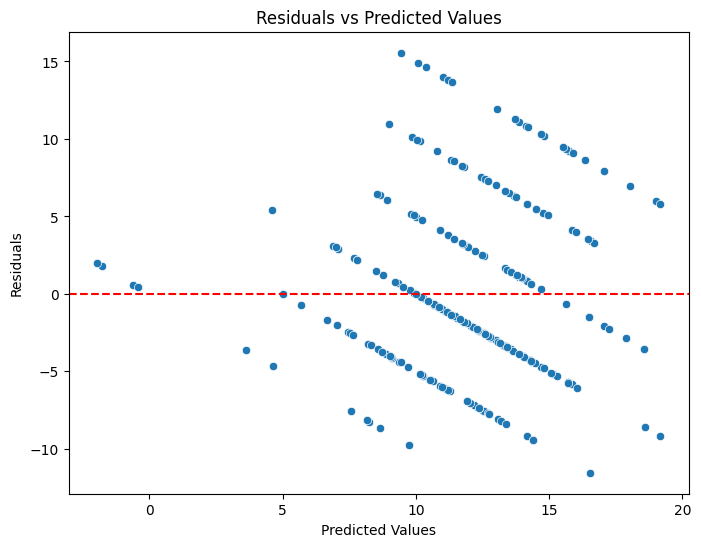

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Predicted values and residuals
predicted_values = model.fittedvalues
residuals = model.resid

# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=predicted_values, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Residuals vs Predicted Values")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()


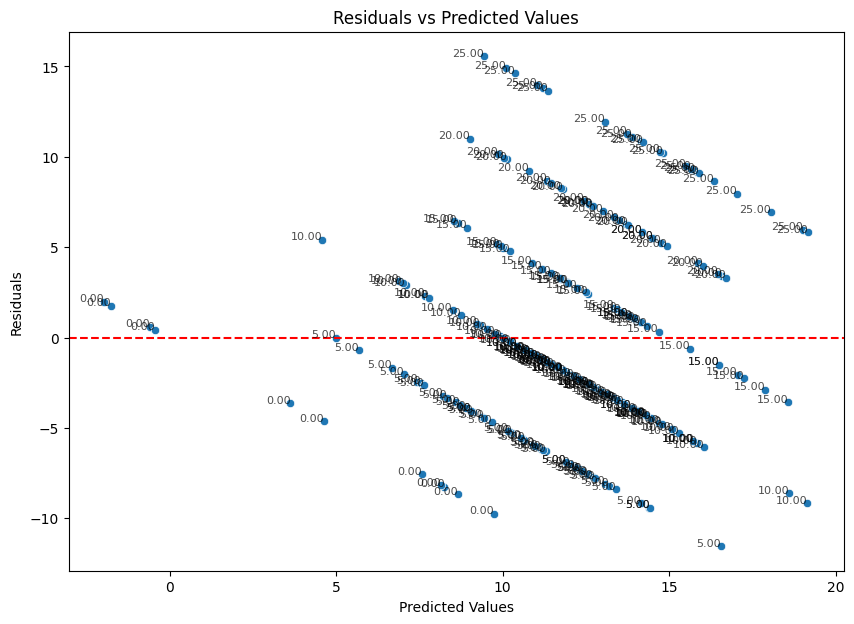

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Predicted values, residuals, and actual values
predicted_values = model.fittedvalues
residuals = model.resid
actual_values = y  # Actual target values (house_wtp)

# Scatter plot
plt.figure(figsize=(10, 7))
sns.scatterplot(x=predicted_values, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')  # Reference line for residual = 0
plt.title("Residuals vs Predicted Values")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")

# Annotate each point with the actual value
for i, txt in enumerate(actual_values):
    plt.annotate(f"{txt:.2f}", (predicted_values[i], residuals[i]),
                 fontsize=8, ha='right', alpha=0.7)

plt.show()


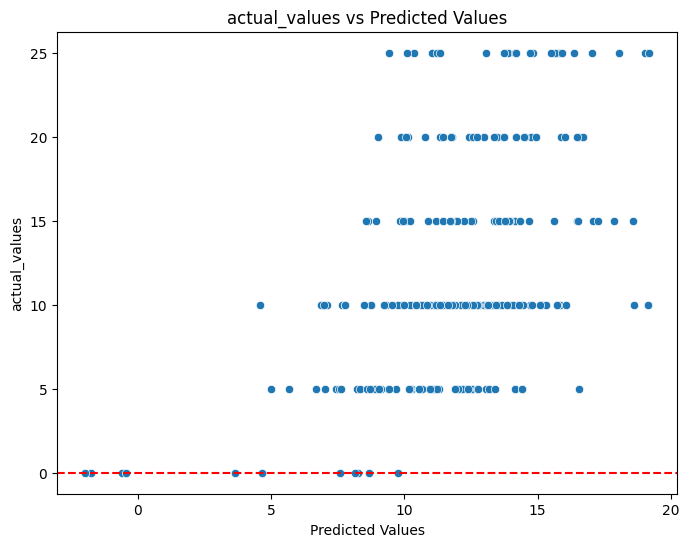

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=predicted_values, y=actual_values)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("actual_values vs Predicted Values")
plt.xlabel("Predicted Values")
plt.ylabel("actual_values")
plt.show()


In [ ]:
# Extract residuals and fitted values
residuals = model.resid
predicted_values = model.fittedvalues

# Perform Breusch-Pagan test
from statsmodels.stats.diagnostic import het_breuschpagan
bp_test = het_breuschpagan(residuals, X)
print("Breusch-Pagan Test Results:")
print(f"LM Statistic: {bp_test[0]}, p-value: {bp_test[1]}")

if bp_test[1] < 0.05:
    print("Homoscedasticity is violated (heteroscedasticity exists).")
else:
    print("Homoscedasticity assumption holds.")


Breusch-Pagan Test Results:
LM Statistic: 21.726195263067535, p-value: 0.7938069157720667
Homoscedasticity assumption holds.


In [ ]:
from scipy.stats import shapiro, kstest

# Shapiro-Wilk Test
shapiro_test = shapiro(residuals)
print(f"Shapiro-Wilk Test Statistic: {shapiro_test.statistic}, p-value: {shapiro_test.pvalue}")

# KS Test
ks_test = kstest(residuals, 'norm', args=(residuals.mean(), residuals.std()))
print(f"KS Test Statistic: {ks_test.statistic}, p-value: {ks_test.pvalue}")


Shapiro-Wilk Test Statistic: 0.9626927061850875, p-value: 5.8236024828204276e-06
KS Test Statistic: 0.10728616264821111, p-value: 0.00686124085980444


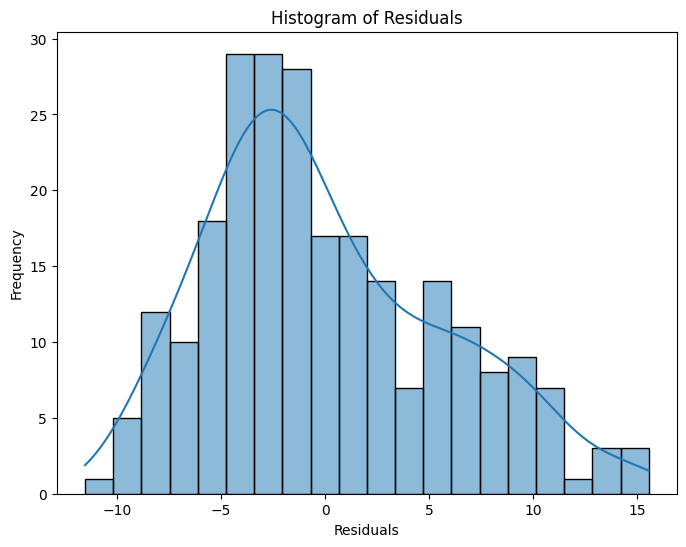

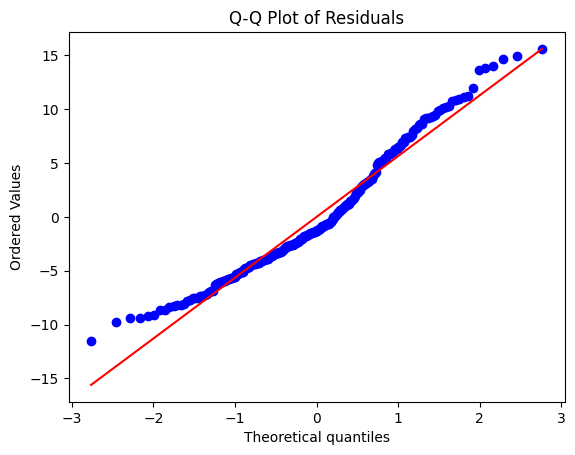

In [ ]:
import scipy.stats as stats

# Histogram
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=20)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

# Q-Q Plot
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.show()


In [ ]:
from sklearn.utils import resample

boot_means = []
for i in range(1000):  # 1000 bootstrap samples
    X_boot, y_boot = resample(X, y)
    model_boot = sm.OLS(y_boot, X_boot).fit()
    y_boot_pred = model_boot.predict(X_boot)
    boot_means.append(np.mean(y_boot_pred))

print(f"Bootstrap Average WTP: {np.mean(boot_means):.2f}")
print(f"Bootstrap Std Dev: {np.std(boot_means):.2f}")


Bootstrap Average WTP: 11.94
Bootstrap Std Dev: 0.42


### CVM after removing zero values

In [ ]:
# Step 1: Remove rows where y (house_wtp) is 0
cvm_df_filtered = cvm_df[cvm_df['house_wtp'] != 0]

# Step 2: Apply log1p transformation on y
#y_transformed = np.log1p(cvm_df_filtered['house_wtp'])

# Step 3: Define X (features) and transformed y (target)
X = cvm_df_filtered.drop(columns=['house_wtp','quality_of_life_green_space','children_physical_development',
                                  'home_type','awareness_gov_incentives','distance_to_green_space','luxury_or_necessity',
                                  'health_importance'])
#y = y_transformed
y = cvm_df_filtered['house_wtp']
# Add a constant term to the model (for the intercept)
X = sm.add_constant(X)

# Step 4: Perform multiple linear regression
model = sm.OLS(y, X).fit()

# Step 5: Display the regression results
print("Regression Results:")
print(model.summary())

Regression Results:
                            OLS Regression Results                            
Dep. Variable:              house_wtp   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     1.434
Date:                Mon, 23 Dec 2024   Prob (F-statistic):             0.0823
Time:                        04:46:53   Log-Likelihood:                -730.01
No. Observations:                 232   AIC:                             1518.
Df Residuals:                     203   BIC:                             1618.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [ ]:
y.head()

,house_wtp
0,10
1,10
2,5
3,15
4,10


In [ ]:
# Calculate the average of the transformed y (log1p of house_wtp)
average_y = y.mean()
print(f"The average of the y is: {average_y:.2f}")


The average of the y is: 12.52


In [ ]:
# Extract residuals and fitted values
residuals = model.resid
predicted_values = model.fittedvalues

# Perform Breusch-Pagan test
from statsmodels.stats.diagnostic import het_breuschpagan
bp_test = het_breuschpagan(residuals, X)
print("Breusch-Pagan Test Results:")
print(f"LM Statistic: {bp_test[0]}, p-value: {bp_test[1]}")

if bp_test[1] < 0.05:
    print("Homoscedasticity is violated (heteroscedasticity exists).")
else:
    print("Homoscedasticity assumption holds.")

Breusch-Pagan Test Results:
LM Statistic: 20.60915999236793, p-value: 0.8412589671972167
Homoscedasticity assumption holds.


In [ ]:
from scipy import stats

# Shapiro-Wilk test for normality of residuals
shapiro_stat, shapiro_p = stats.shapiro(residuals)
print(f"Shapiro-Wilk Test: Statistic = {shapiro_stat}, p-value = {shapiro_p}")

# Kolmogorov-Smirnov test for normality of residuals
ks_stat, ks_p = stats.kstest(residuals, 'norm')
print(f"Kolmogorov-Smirnov Test: Statistic = {ks_stat}, p-value = {ks_p}")

# Check if p-value < 0.05 for normality assumption
if shapiro_p < 0.05 or ks_p < 0.05:
    print("Residuals do not follow a normal distribution.")
else:
    print("Residuals are normally distributed.")


Shapiro-Wilk Test: Statistic = 0.9551683163644283, p-value = 1.26514649941182e-06
Kolmogorov-Smirnov Test: Statistic = 0.43610574564913435, p-value = 1.1833321255540658e-40
Residuals do not follow a normal distribution.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Predicted values, residuals, and actual values
predicted_values = model.fittedvalues
residuals = model.resid
actual_values = y  # Actual target values (house_wtp)


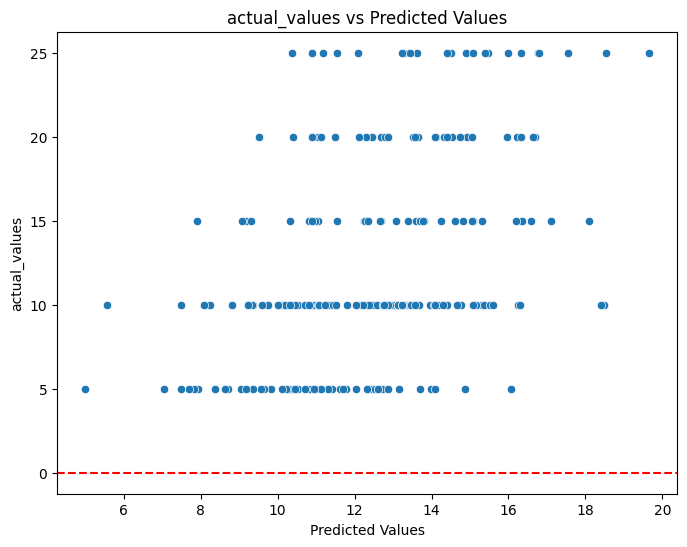

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=predicted_values, y=actual_values)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("actual_values vs Predicted Values")
plt.xlabel("Predicted Values")
plt.ylabel("actual_values")
plt.show()
